In [30]:
import os
from PIL import Image
import imagehash
import matplotlib.pyplot as plt

In [43]:
def compare_images(input_image_path, imagesDBFolder):
    input_hash = imagehash.phash(Image.open(input_image_path))
    print("Input Image:", input_image_path)
    plt.imshow(Image.open(input_image_path))            
    #plt.axis('off')  # Hide axis
    plt.show()

    database_images =[os.path.join(imagesDBFolder, file) for file in os.listdir(imagesDBFolder) if file.lower().endswith('.jpg')]
    similar_images = []
    
    for db_image_path in database_images:
        # You can adjust the threshold value to control the similarity sensitivity.
        db_hash = imagehash.phash(Image.open(db_image_path))
        if input_hash - db_hash < 20:  # Adjust the threshold as needed
            similar_images.append(db_image_path)
            print(db_image_path, 'hash Difference:',(input_hash - db_hash))
            plt.imshow(Image.open(db_image_path))            
            plt.axis('off')  # Hide axis
            plt.show()
    
    return similar_images


Input Image: D:/Projects/CopyrightsPhash/picsDB/gold-dan-rotate.jpg


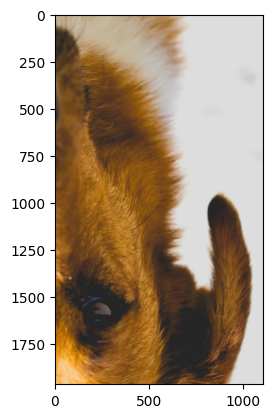

D:/Projects/CopyrightsPhash/picsDB/gold-dan-rotate.jpg hash Difference: 0


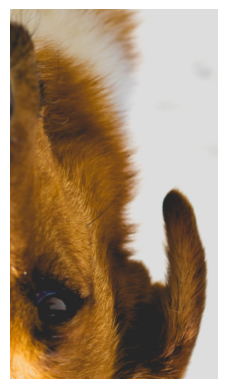

D:/Projects/CopyrightsPhash/picsDB/gold-dan-rotate.jpg


In [45]:
if __name__ == "__main__":
    input_image_path = "D:/Projects/CopyrightsPhash/picsDB/gold-dan-rotate.jpg"
    imagesDBFolder = "D:/Projects/CopyrightsPhash/picsDB/"

    similar_images = compare_images(input_image_path, imagesDBFolder)
    
    if similar_images:        
        for img_path in similar_images:
            print(img_path)
    else:
        print("No similar images found.")
